In [78]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# to not display the warnings of tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [79]:
# parameters to be set ("optimum" hyperparameters obtained from grid search):
look_back = 4
epochs = 2000
batch_size = 32

In [80]:
# fix random seed for reproducibility
np.random.seed(7)

In [81]:
dataset = [40, 50, 80, 100, 84, 98, 130, 125,
                    140, 180, 202, 219, 231, 207, 230,
                    250, 277, 291, 302, 315, 300,
                    312, 348, 367, 380, 350, 261, 289,
                    320, 390, 430, 467, 419, 422, 489,
                    512, 560, 620, 650, 710, 730, 722, 780,
                    820, 892, 878, 902, 950, 961, 988, 946]
for i in range(len(dataset)):
    dataset[i] = [dataset[i]]

In [83]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [84]:
dataset = scaler.fit_transform(dataset)

In [85]:
train = np.array(dataset)

In [86]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [87]:
trainX, trainY = create_dataset(train, look_back)

In [88]:
trainY

array([0.0464135 , 0.06118143, 0.09493671, 0.08966245, 0.10548523,
       0.14767932, 0.17088608, 0.18881857, 0.20147679, 0.17616034,
       0.20042194, 0.22151899, 0.25      , 0.26476793, 0.27637131,
       0.29008439, 0.2742616 , 0.28691983, 0.32489451, 0.34493671,
       0.35864979, 0.32700422, 0.23312236, 0.26265823, 0.29535865,
       0.36919831, 0.41139241, 0.45042194, 0.39978903, 0.40295359,
       0.47362869, 0.4978903 , 0.54852321, 0.61181435, 0.64345992,
       0.70675105, 0.7278481 , 0.71940928, 0.78059072, 0.82278481,
       0.89873418, 0.88396624, 0.9092827 , 0.95991561, 0.97151899,
       1.        ])

In [89]:
# reshape input of the LSTM to be format [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

In [90]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=batch_size)

c:\users\costi\appdata\local\programs\python\python35\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/200
46/46 [==============================] - 1s 25ms/step - loss: 0.2385
Epoch 2/200
46/46 [==============================] - 0s 304us/step - loss: 0.2281
Epoch 3/200
46/46 [==============================] - 0s 282us/step - loss: 0.2182
Epoch 4/200
46/46 [==============================] - 0s 282us/step - loss: 0.2094
Epoch 5/200
46/46 [==============================] - 0s 304us/step - loss: 0.1997
Epoch 6/200
46/46 [==============================] - 0s 326us/step - loss: 0.1915
Epoch 7/200
46/46 [==============================] - 0s 282us/step - loss: 0.1829
Epoch 8/200
46/46 [==============================] - 0s 282us/step - loss: 0.1750
Epoch 9/200
46/46 [==============================] - 0s 239us/step - loss: 0.1673
Epoch 10/200
46/46 [==============================] - 0s 304us/step - loss: 0.1591
Epoch 11/200
46/46 [==============================] - 0s 282us/step - loss: 0.1520
Epoch 12/200
46/46 [==============================] - 0s 304us/step - loss: 0.1454
Epoch 13/200
4

Epoch 99/200
46/46 [==============================] - 0s 326us/step - loss: 0.0103
Epoch 100/200
46/46 [==============================] - 0s 217us/step - loss: 0.0101
Epoch 101/200
46/46 [==============================] - 0s 217us/step - loss: 0.0098
Epoch 102/200
46/46 [==============================] - 0s 217us/step - loss: 0.0096
Epoch 103/200
46/46 [==============================] - 0s 217us/step - loss: 0.0093
Epoch 104/200
46/46 [==============================] - 0s 261us/step - loss: 0.0090
Epoch 105/200
46/46 [==============================] - 0s 261us/step - loss: 0.0088
Epoch 106/200
46/46 [==============================] - 0s 217us/step - loss: 0.0085
Epoch 107/200
46/46 [==============================] - 0s 239us/step - loss: 0.0083
Epoch 108/200
46/46 [==============================] - 0s 348us/step - loss: 0.0081
Epoch 109/200
46/46 [==============================] - 0s 239us/step - loss: 0.0079
Epoch 110/200
46/46 [==============================] - 0s 348us/step - loss: 

Epoch 196/200
46/46 [==============================] - 0s 261us/step - loss: 0.0021
Epoch 197/200
46/46 [==============================] - 0s 217us/step - loss: 0.0021
Epoch 198/200
46/46 [==============================] - 0s 304us/step - loss: 0.0021
Epoch 199/200
46/46 [==============================] - 0s 326us/step - loss: 0.0021
Epoch 200/200
46/46 [==============================] - 0s 261us/step - loss: 0.0021


In [91]:
# make predictions
trainPredict = model.predict(trainX)

In [92]:
trainPredict = scaler.inverse_transform(trainPredict)

In [134]:
pred

array([[9.243623e+08]], dtype=float32)

In [97]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

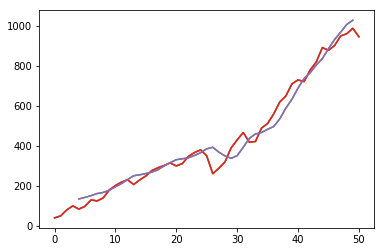

In [99]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.show()

In [123]:
trainX[0]

array([[0.        ],
       [0.01054852],
       [0.04219409],
       [0.06329114]])

In [121]:
l = trainX[len(trainX) - 1]
s = [list(x) for x in l]
s

[[0.8839662447257383],
 [0.9092827004219408],
 [0.9599156118143458],
 [0.9715189873417721]]

In [126]:
t = np.array([s])
t

array([[[0.88396624],
        [0.9092827 ],
        [0.95991561],
        [0.97151899]]])

In [127]:
pred = model.predict(t)

In [130]:
pred = scaler.inverse_transform(pred)
list(pred[0])

[924362300.0]

In [133]:
k = []
for i in range(1, len(s)):
    k.append(s[i])
k.append(list(pred[0]))
k

[[0.9092827004219408],
 [0.9599156118143458],
 [0.9715189873417721],
 [924362300.0]]

In [136]:
l = trainX[len(trainX) - 1]
s = [list(x) for x in l]
for it in range(10):
    t = np.array([s])
    pred = model.predict(t)
    predt = scaler.inverse_transform(pred)
    k = []
    for i in range(1, len(s)):
        k.append(s[i])
    k.append(list(pred[0]))
    s = k
    print (predt)

[[1028.508]]
[[1074.8751]]
[[1127.3496]]
[[1181.7805]]
[[1248.9644]]
[[1316.2633]]
[[1389.5437]]
[[1468.7815]]
[[1554.8303]]
[[1645.6648]]
